In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
plt.rcParams["font.family"] = 'Malgun Gothic'


# 빅데이터 분석에 필요한 pandas의 데이터프레임의 핵심 기능(7,8,9,10장)
    * 데이터프레임 생성: pd.DataFrame() 함수를 사용하여 데이터프레임을 생성할 수 있다. 
    * 데이터프레임 인덱싱: loc 및 iloc 인덱서를 사용하여 데이터프레임의 특정 행과 열을 선택할 수 있다.
    * 데이터프레임 슬라이싱: 슬라이싱 연산자를 사용하여 데이터프레임의 부분을 선택할 수 있다.
    * 데이터프레임 필터링: 불리언 마스크를 사용하여 데이터프레임의 행과 열을 필터링할 수 있다.
    * 데이터프레임 정렬: sort_values() 메서드를 사용하여 데이터프레임을 열 또는 인덱스별로 정렬할 수 있다.
    * 데이터프레임 집계: groupby() 메서드를 사용하여 데이터프레임을 그룹화하고 집계 연산을 수행할 수 있다.
    * 데이터프레임 전처리 :
            *결측치 처리: isna(), isnull(), drop_na(), fillna() 메서드를 사용하여 데이터프레임의 결측치를 채울 수 있다.
            *중복값 처리: duplicated(), drop_duplicates()
    * 데이터프레임 결합: merge() 또는 concat() 메서드를 사용하여 여러 데이터프레임을 결합할 수 있다.


## 7장 데이터 정제 및 준비(Data Cleaning and Preparation)
* 7.1 누락된 데이터 처리하기
  * np.nan
  * None
  * isna() : 결측치에 대해 True 값으로 반환
  * dropna() : 결측치 제거하기
  * fillna() :결측값을 다른 값으로 채우는 데 사용


In [7]:
# ex : 다음 주어진 결측치을 담고 있는 데이터프레임에 대해 정제 작업하기

np.random.seed(1)
data=np.random.standard_normal((7,3)) #(행, 열) -> 21개의 데이터
df = pd.DataFrame(data)

df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan


#1. 결측치 확인 및 처리
df.isna()

filtered = df.dropna() #결측치를 포함한 행을 삭제
filtered

# filtered.reset_index(drop=True) # 색인 재설정

# #2. 결측치를 평균값으로 채우기
# df.fillna(df.mean())

,0,1,2
4,-0.322417,-0.384054,1.133769
5,-1.099891,-0.172428,-0.877858
6,0.042214,0.582815,-1.100619


7.2 Transformation
* duplicated()
  * 데이터프레임의 중복된 행 또는 값은 True로 표시되고, 중복되지 않은 행 또는 값은 False로 표시    
* drop_duplicates()
  * 데이터프레임의 모든 열을 고려하여 중복된 행 또는 값을 제거
    * subset: 중복된 행 또는 값을 제거하는 데 사용할 열의 리스트
    * keep: 다음 값 중 하나.
      * first: 첫 번째 중복된 행 또는 값을 유지.
      * last: 마지막 중복된 행 또는 값을 유지
      * False: 모든 중복된 행 또는 값을 제거.
      * inplace: DataFrame을 변경할지 여부를 표시.

In [10]:
# ex 데이터프레임의 중복 데이터 제거하기 
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 5, 5]})


#1. 중복된 데이터 확인
data.duplicated(subset=['k1','k2'], keep='first')

#2. 중복된 행 제거하기
data.drop_duplicates(subset=['k1','k2'], keep='first')

#3. "K1" 열을 기준으로 중복된 행을 필터링하기
data.drop_duplicates(subset=['k1'])

,k1,k2
0,one,1
1,two,1


## 문제: 주어진 데이터셋를 정제하고 준비하여 다음 데이터 분석을 수행하시오.
* 데이터셋:


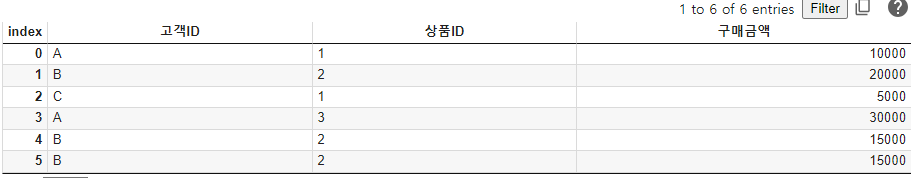
  * 고객별 구매 금액 합계
  * 상품별 구매 금액 합계
  * 고객별로 가장 많이 구매한 상품

In [36]:
# 데이터셋
data = [
  {"customer_id": "A", "product_id": "1", "amount": 10000},
  {"customer_id": "B", "product_id": "2", "amount": 20000},
  {"customer_id": "C", "product_id": "1", "amount": 5000},
  {"customer_id": "A", "product_id": "3", "amount": 30000},
  {"customer_id": "B", "product_id": "2", "amount": 15000},
  {"customer_id": "B", "product_id": "2", "amount": 15000}
]

In [37]:
# 데이터프레임 탐색하기
# 1) 주어진 데이터셋을 데이터프레임으로 변환하기
df = pd.DataFrame(data)
df
# 2) 데이터프레임을 첫 행부터 3번째 행까지 슬라이싱하기
df.head(3)

# 3)데이터프레임의 열 레이블 변경하기
df.rename(columns={"customer_id":"고객ID", "product_id":"상품ID", "amount":"금액"}, inplace=True)
df

,고객ID,상품ID,금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000
5,B,2,15000


In [38]:
# 데이터프레임 정제하기
# 1) 결측치 데이터 확인하기
df.isna()

# 2) 중복 데이터 확인하기
df.duplicated()

# 3) 중복 데이터 제거
df.drop_duplicates()

,고객ID,상품ID,금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000


In [39]:
# 데이터프레임 정렬하기
# 1) 고객ID 와 상품ID의 값을 기준으로 데이터프레임의 행을 내림차순으로 정렬하기
df = df.sort_values(by=["고객ID","상품ID"], ascending=False)
df


# 2) 데이터프레임의 기존의 인덱스을 변경 또는 재설정하기
df1 = df.reset_index()
df1



,index,고객ID,상품ID,금액
0,2,C,1,5000
1,1,B,2,20000
2,4,B,2,15000
3,5,B,2,15000
4,3,A,3,30000
5,0,A,1,10000


In [44]:
# 데이터분석하기
# 1) 고객별 구매 금액 합계를 계산하기
result = df.groupby(["고객ID"])["금액"].sum()
result

고객ID
A    40000
B    50000
C     5000
Name: 금액, dtype: int64

In [45]:
# 2) 상품별 구매 금액 합계를 계산하기
result = df.groupby(["상품ID"])["금액"].sum()
result

상품ID
1    15000
2    50000
3    30000
Name: 금액, dtype: int64

In [48]:
# 3) 상위 최우수 고객 2명 필터링하기
consumer = df.groupby(["고객ID"])["금액"].sum().sort_values(ascending = False)
print(consumer.head(2))
print(consumer.idxmax()) # 최우수고객 ID출력

고객ID
B    50000
A    40000
Name: 금액, dtype: int64
B


In [52]:
# 4) 고객에서 가장 인기있는 상품 찾기
result = df["상품ID"].value_counts()
result.idxmax()

'2'

In [57]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'  # 한글 폰트 설정 (예시: 나눔고딕)


<Axes: xlabel='고객ID'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 

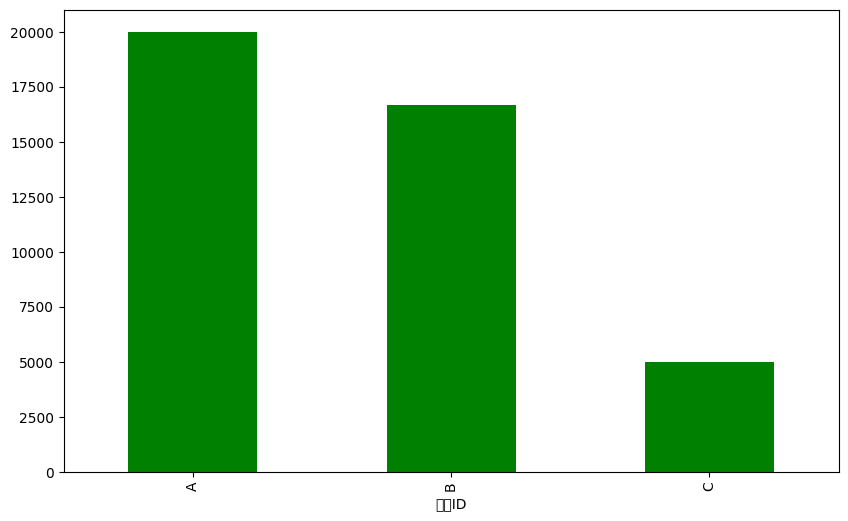

In [58]:
# 5) 고객ID별 구매금액의 평균를 계산하고 막대그래프로 시각화하기
result = round(df.groupby(["고객ID"])["금액"].mean(),2)

plt.figure() # 하나의 도화지에 한개의 그래프
result.plot(kind = "bar", color = "green")



고객ID  상품ID
A     1       10000
      3       30000
B     2       50000
C     1        5000
Name: 금액, dtype: int64



AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing

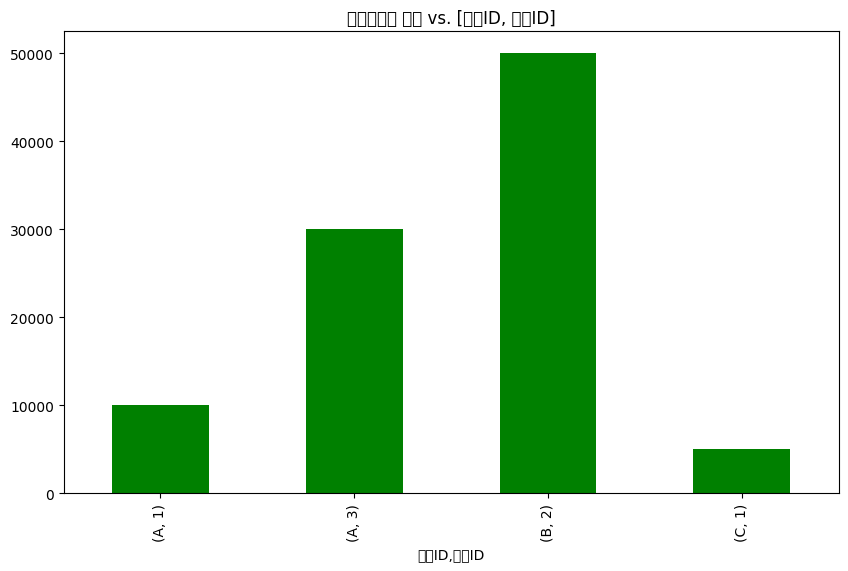

In [59]:
# 6) 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 합계를 계산하고 시각화하기
result = df.groupby(["고객ID","상품ID"])["금액"].sum()
print(result)
print()

plt.figure()
result.plot(kind="bar", color="green")
plt.title("구매금액의 합계 vs. [고객ID, 상품ID]")
plt.ylable("구매 금액 합계")
plt.xlable("(고객ID, 상품ID)")
plt.show()


## 8장 다중색인(mutiIndex)
* 다중색인(multi-index)은 데이터프레임의 인덱스를 여러 열로 구성하는 것
* 다중색인 사용
  * 데이터를 여러 기준으로 그룹화
  * 데이터를 여러 기준으로 검색 및 집계 연산


In [49]:
# case1>
# 1. 다중색인 생성

# 1) 데이터프레임 생성
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df.index

# 2) 다중 색인 설정
index = [('X', 1), ('X', 2), ('Y', 1)]

multi_index = pd.MultiIndex.from_tuples(index, names=('first', 'second'))
multi_index

# 2) 단일 데이터프레임 -> 계층구조 데이터프레임
df.index = multi_index
df

# #2.다중색인 사용

# 데이터프레임을 다중 색인의 첫 번째 인덱스 레벨을 기준으로 그룹화하기
grouped = df.groupby(level = 0)
grouped

print(df)
# 각 그룹에 대한 정보 출력하기
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()

              A  B
first second      
X     1       1  4
      2       2  5
Y     1       3  6
Group: X
              A  B
first second      
X     1       1  4
      2       2  5

Group: Y
              A  B
first second      
Y     1       3  6



In [52]:
# case2> 

# 1. 다중 인덱스를 가진 데이터프레임 생성
index = [['A', 'A', 'B', 'B'], [1, 2, 1, 2]]
index = pd.MultiIndex.from_arrays(index, names=('first', 'second'))
df = pd.DataFrame({'data': [1, 2, 3, 4]}, index=index)
df

# 2.다중색인 사용
# 첫 번째 인덱스 수준을 기준으로 그룹화
grouped = df.groupby(level=0)

# 각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


data
first second      
A     1          1
      2          2
B     1          3
      2          4

In [55]:
# case3>
# 1. 다중 색인 생성
df = pd.DataFrame({
    "data": [1, 2, 3, 4],
    "index1": ["A", "A", "B", "B"],
    "index2": [1, 2, 1, 2],
})

df #단일 인덱스
df = df.set_index(["index1", "index2"]) #!!!
df


# 2.다중 색인 사용
# 첫 번째 인덱스 수준을 기준으로 그룹화
grouped = df.groupby(level=0)

# 각 그룹에 대한 정보 출력
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()


Group: A
               data
index1 index2      
A      1          1
       2          2

Group: B
               data
index1 index2      
B      1          3
       2          4



In [ ]:
# Note: 다중 색인 데이터프레임의 슬라이싱 

# 다중 색인 데이터프레임
df = pd.DataFrame({
    "data": [1, 2, 3, 4],
    "index1": ["A", "A", "B", "B"],
    "index2": [1, 2, 1, 2],
})

df = df.set_index(["index1", "index2"])
print(df)
print()

# 슬라이싱
df.loc["A", 1] # index1에서 "A" 선택, index1에서 1 선택

df.loc["B", :] # index1에서 "B" 선택, index1에서 모든 값 선택

df.loc[[('A', 1),('B',1)]] # index1에서 "A"와 "B" 선택, index1에서 1 선택

### [문제]: 다음 DataFrame에서 고객ID와 상품ID를 기준으로 다중색인을 만들고, 각 그룹의 구매금액의 합계를 계산하세요.

In [ ]:
# 데이터셋
data = [
  {"고객ID": "A", "상품ID": "1", "구매금액": 10000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 20000},
  {"고객ID": "C", "상품ID": "1", "구매금액": 5000},
  {"고객ID": "A", "상품ID": "3", "구매금액": 30000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000}
]

# 1. 데이터프레임 생성
df = pd.DataFrame(data)
print(df)
print()

# 2. 고객ID와 상품ID을 기준으로 다중색인을 생성하여 계층구조인 데이터프레임을 생성하기
df.set_index(['고객ID', '상품ID'], inplace=True)
print(df)
print()

#3. 데이터프레임의 다중색인을 출력하기
df.index

#4. 첫 번째 고객ID 인덱스을 기준으로 그룹화
grouped = df.groupby(level=0)

#5. 각 그룹에 대한 정보 출력
for name, group in grouped_고객ID

In [ ]:
# 6. 고객을 기준으로 묶어서 구매금액의 합을 계산하시오.


# 7. 상품을 기준으로 묶어서 구매금액의 합을 계산하시오.

# 8. 결과를 그래프로 출력하시오.


# 9.2장. plotting with pandas and seaborn


*  Bar Plots
  * 막대 그래프는 범주형 데이터의 빈도, 비율 또는 백분율을 시각화하는 데 효과적
    * 빈도 분포 표시: 범주별 빈도를 시각적으로 비교
      * 각각의 막대가 특정 항목의 빈도를 나타내며, 막대의 높이는 해당 항목의 빈도에 비례
    * 비율 또는 백분율 표시: 범주별로 전체의 비율 또는 백분율을 표시
      * 각 범주의 중요성이나 상대적인 크기를 비교하는 데 도움
    * 시계열 데이터 표시: 시간에 따른 변화를 보여줄 때 유용
      * 각 시점 또는 기간에 대한 데이터를 각각의 막대로 표시
    * 다중 변수의 비교: 여러 범주에 대한 여러 그룹 간의 비교를 수행 사용
      * 각 그룹 간의 차이를 직관적으로 이해

              A         B         C         D
one    0.929616  0.316376  0.183919  0.204560
two    0.567725  0.595545  0.964515  0.653177
three  0.748907  0.653570  0.747715  0.961307
four   0.008388  0.106444  0.298704  0.656411
five   0.809813  0.872176  0.964648  0.723685
six    0.642475  0.717454  0.467599  0.325585


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

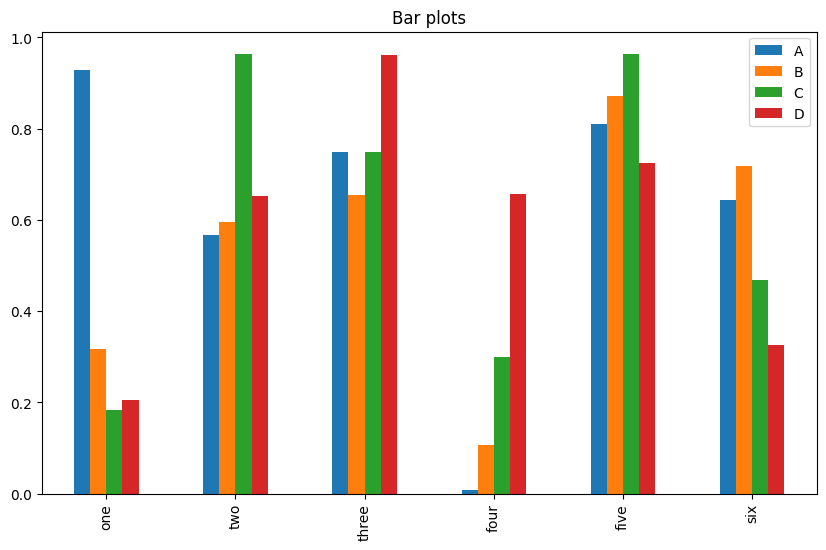

In [68]:
# ex > plot.bar()
#1. DataSet
df = pd.DataFrame(np.random.uniform(size=(6,4)),
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns = ["A","B", "C", "D"])
print(df)
df.plot.bar()
#그래프 속성추가
plt.title("Bar plots")
plt.xlable("X 축")
plt.ylable("Y 축")
plt.show


## [예제]
* 'examples/tips.csv'을 로딩하여 'day'별에 따라 'size' 인원별 팁의 백분율을 보여주는 쌓인 막대 그래프를 그리기
* 팁의 백분율을 보여주는 쌓인 막대그래프 그리기

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/pylabtool

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

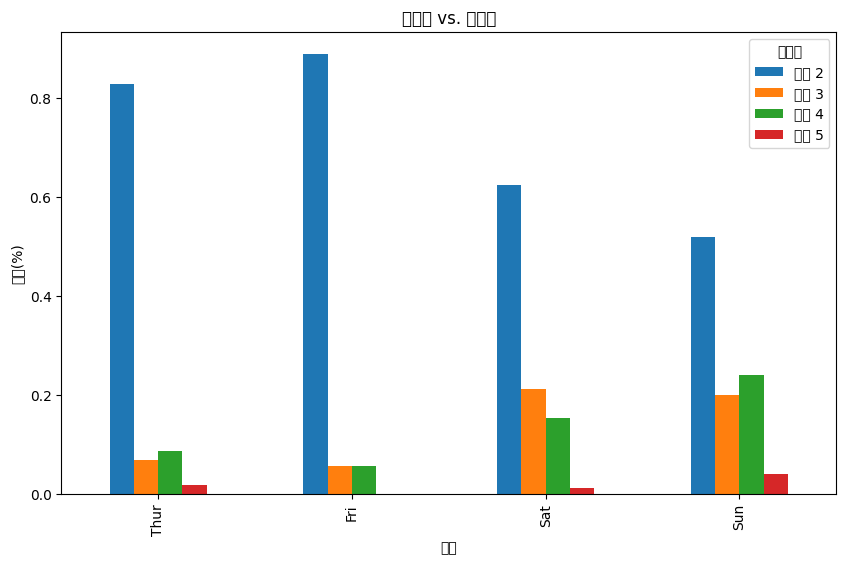

ModuleNotFoundError: No module named 'seaborn'

In [65]:
# 1. Load a dataset
tips = pd.read_csv('examples/tips.csv')

#2. 데이터프레임 -> 교차표(빈도) 데이터프레임로 변환
party_counts = pd.crosstab(tips["day"], tips['size'])
print(party_counts)

#3. 인덱스 재설정
party_counts = party_counts.reindex(index = ["Thur","Fri","Sat","Sun"])


## 3. 필터링
party_counts = party_counts.loc[:,2:5]


# 4. 데이터 정규화 또는 비율로 계산
party_pcts = party_counts.div(party_counts.sum(axis = "columns"),
                              axis = "index")

#5. 막대그래프로 그리기
party_pcts.plot.bar()

plt.xlabel("요일")
plt.ylabel("빈도(%)")
plt.title("요일별 vs. 인원수")
plt.legend(title="인원수", labels=["동행 2", "동행 3", "동행 4", "동행 5"])
plt.show()


# 6. 팁의 배분율 열 추가하기
import seaborn as sns
tips["tip_pct"] = tips['tip'] / (tips['total_bill'] - tips['tip'])
sns.barplot(x = "tip_pct", y='day', data=tips, orient='h', hue='time')

## [문제] 다음 주어진 데이터셋에서 다음 작업을 수행하시오.
  * 나이가 30세 이상인 사람들의 이름을 출력하기
  * 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기
  * 이름이 'Bob'인 사람의 도시를 출력하기

In [ ]:
# dataset
data = {
    'Name': ['John', 'Mary', 'Bob', 'Alice', 'Tom'],
    'Age': [20, 25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Dallas']
}

In [ ]:
# 1. 나이가 30세 이상인 사람들의 이름 출력하기



In [ ]:
# 2. 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기



In [ ]:
# 3. 이름이 'Bob'인 사람의 도시를 출력하기



# 10장 데이터 집계와 그룹 연산
* df.groupby()
    * 하나 이상의 키(함수, 배열, 데이터프레임의 열 이름)를 이용해서 판다스 객체를 여러 조각으로 나누는 방법
* 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약 통계를 계산하는 방법
* 정규화, 선형 회귀, 순위 또는 부분집합 선택 같은 그룹 내 변형이나 다른 조작을 적용하는 방법




* groupby() 연산에 대한 원리
    * 분리-적용-결합(split-apply-combine)
    * df.groupby(by=[열])[열].sum()
    * df.groupby([컬럼 리스트]).집계함수()
    * df.groupby([컬럼 리스트]).agg([집계함수 리스트])
    * df.groupby([컬럼 리스트]).apply([집계함수 또는 lambda])
    * df.groupby([컬럼 리스트])[컬럼리스트].agg([집계함수 리스트])
    * df.groupby([컬럼 리스트])[컬럼리스트].apply([집계함수 또는 lambda])

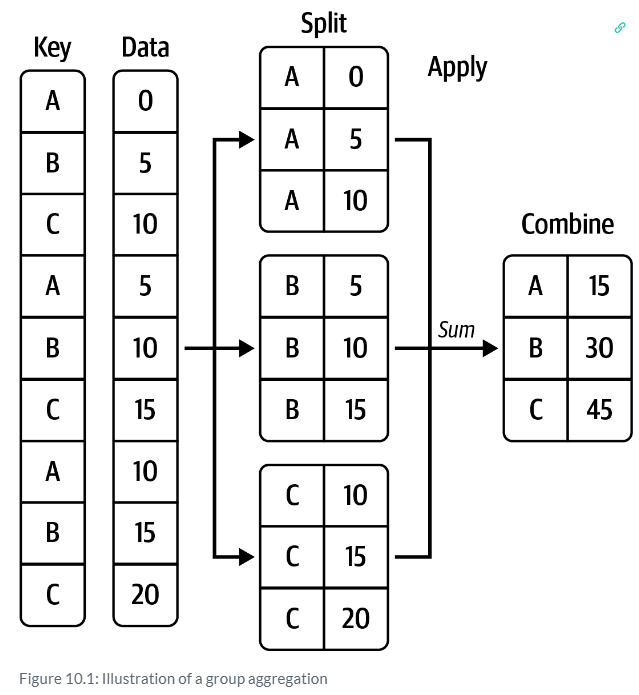

In [74]:
#ex : groupby().mean(), groupby().size(), groupby().count()
# 가상의 데이터프레임 생성
df = pd.DataFrame({
    'key': ['A', 'B', 'C','A', 'B','C', 'A', 'B','C'],
    'key2': ['X', 'Y', 'Z','X', 'Y','Z', 'X', 'Y','Z'],
    'data': [0,5,10,5,10,15,10,15,20],
    'data2': [5,10,15,10,15,20,15,20,25]
})
df
# "key" 열의 값에 따라 그룹화하여 각 그룹에 대해 groupby 연산
result = df.groupby(["key"]).size()

result = df.groupby(["key"]).count()


result = df.groupby(["key"]).mean(numeric_only=True)


# # "key"과 "key2" 열의 값에 따라 그룹화하여 각 그룹에 대해 평균을 계산
# result1 = df.groupby(["key","key2"]).mean()


# result2 = df.groupby(["key", "key2"]).size() # 데이터프레임에서 각 그룹의 개수


# result3 = df.groupby(["key", "key2"]).count() # 데이터프레임에서 각 그룹의 데이터 개수



,key2,data,data2
key,,,
A,3,3,3
B,3,3,3
C,3,3,3


### [예제] 주어진 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하기

In [2]:
# 데이터셋
dataset = {"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)}
df = pd.DataFrame(dataset)
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [6]:
* groupby() 집계메서드
  * size(), count(), sum(), mean(), std(), max(), min(), ...

SyntaxError: invalid syntax (1307018225.py, line 1)

In [16]:
# # mean() - 주어진 데이터을 컬럼을 사용하여 각 그룹으로 묶어 평균 집계 
# ## 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외됨

# case1
# result = df.groupby("key1").mean()
# result = df.groupby("key1").size()
# result = df.groupby("key1").count()

# case2
# result = df.groupby("key2").mean(numeric_only=True) # key1열이 결과에서 빠짐: df['key1']은 숫자 데이터가 아님

# case3
# result = df.groupby(["key1", "key2"]).mean() # 다중색인 데이터프레임 -> key1, key2

# case4
# # 특히 대용량 데이터셋을 다룰 때 소수의 열(data2)만 집계(평균)하기
result =  df.groupby(["key1", "key2"])[["data2"]].mean()
print(result)
result.index

              data2
key1 key2          
a    1     0.281746
     2     0.769023
b    1    -1.296221
     2     1.007189


MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           names=['key1', 'key2'])

## 예제: 10.2.1 열에 여러 가지 함수 적용하기
* Column-Wise and Multiple Function Application


In [17]:
# 데이터셋 가져오기
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [19]:
# total_bill에서 팁의 비율을 tip_pct 열에 출가하기
tips["tip_pct"] = round(tips["tip"] / tips["total_bill"] *100,2)
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,5.94
1,10.34,1.66,No,Sun,Dinner,3,16.05
2,21.01,3.50,No,Sun,Dinner,3,16.66
3,23.68,3.31,No,Sun,Dinner,2,13.98
4,24.59,3.61,No,Sun,Dinner,4,14.68


* agg()
  * 데이터프레임의 모든 열을 집계하려면 mean이나 std 같은 메서드를 호출하거나 agg를 통해 원하는 함수를 사용
  * 열에 따라 다른 함수를 사용해서 집계를 수행하거나 여러 개의 함수를 한 번에 적용하기

In [23]:
# ex1 > day와 smoker로 그룹화된 데이터를 tip_pct로 평균 집계

grouped = tips.groupby(["day", "smoker"])
grouped_pct = grouped["tip_pct"]
result = grouped_pct.agg("mean") # 기술 통계에서는 함수 이름을 문자열로 넘기기

result = tips.groupby(["day", "smoker"])["tip_pct"].agg("mean")
print(result.index)

MultiIndex([( 'Fri',  'No'),
            ( 'Fri', 'Yes'),
            ( 'Sat',  'No'),
            ( 'Sat', 'Yes'),
            ( 'Sun',  'No'),
            ( 'Sun', 'Yes'),
            ('Thur',  'No'),
            ('Thur', 'Yes')],
           names=['day', 'smoker'])


In [26]:
#ex2 > day와 smoker로 그룹화된 데이터를 tip_pct 평균을 정렬

# 1. 그룹화하여 각 그룹별로 평균 tip_pct 계산-> 단일 데이터프레임에 sort_values(by)적용
grouped = tips.groupby(["day","smoker"])["tip_pct"].agg("mean").reset_index()


grouped_sorted = grouped.sort_values(by="tip_pct", ascending = False)

print(grouped_sorted)

    day smoker    tip_pct
5   Sun    Yes  18.724737
1   Fri    Yes  17.478667
7  Thur    Yes  16.385294
6  Thur     No  16.028667
4   Sun     No  16.011228
2   Sat     No  15.804222
0   Fri     No  15.165000
3   Sat    Yes  14.790000


In [27]:
# ex3 > day와 smoker로 그룹화된 데이터를 tip_pct 평균과 표준편차 집계 연산
def diff(arr):
    return arr.max() - arr.min()
    
result = tips.groupby(["day", "smoker"])['tip_pct'].agg(["mean", "std", diff])
print(result)
#result.agg(["mean", "std"])  #함수 이름을 열 이름으로 하는 데이터프레임을 얻는다.

                  mean        std   diff
day  smoker                             
Fri  No      15.165000   2.809703   6.73
     Yes     17.478667   5.129855  15.99
Sat  No      15.804222   3.976763  23.52
     Yes     14.790000   6.137342  29.01
Sun  No      16.011228   4.234462  19.33
     Yes     18.724737  15.412702  64.46
Thur No      16.028667   3.876920  19.33
     Yes     16.385294   3.939388  15.13


In [30]:
# ex4 >데이터프레임은 열마다 다른 함수를 적용하거나 여러 개의 함수를 모든 열에 적용하기
functions = ["count", "mean", "max"]
result = tips.groupby(["day", "smoker"])[["tip_pct", "total_bill"]].agg(functions)
#result = grouped[["tip_pct", "total_bill"]].agg(functions)  # 데이터프레임은 계층적인 열로 구성
print(result)

            tip_pct                   total_bill                  
              count       mean    max      count       mean    max
day  smoker                                                       
Fri  No           4  15.165000  18.77          4  18.420000  22.75
     Yes         15  17.478667  26.35         15  16.813333  40.17
Sat  No          45  15.804222  29.20         45  19.661778  48.33
     Yes         42  14.790000  32.57         42  21.276667  50.81
Sun  No          57  16.011228  25.27         57  20.506667  48.17
     Yes         19  18.724737  71.03         19  24.120000  45.35
Thur No          45  16.028667  26.63         45  17.113111  41.19
     Yes         17  16.385294  24.13         17  19.190588  43.11


## # 10.2.2 색인되지 않은 형태로 집계된 데이터 반환하기
* 집계된 데이터는 유일한 그룹 키 조합으로 (어떤 경우에는 계층적 색인)되어 반환되었다.
* groupby메서드에 as_index=False를 넘겨서 색인 작업을 비활성화

In [33]:
grouped = tips.groupby(["day", "smoker"], as_index = False).mean(numeric_only=True)
print(grouped)

    day smoker  total_bill       tip      size    tip_pct
0   Fri     No   18.420000  2.812500  2.250000  15.165000
1   Fri    Yes   16.813333  2.714000  2.066667  17.478667
2   Sat     No   19.661778  3.102889  2.555556  15.804222
3   Sat    Yes   21.276667  2.875476  2.476190  14.790000
4   Sun     No   20.506667  3.167895  2.929825  16.011228
5   Sun    Yes   24.120000  3.516842  2.578947  18.724737
6  Thur     No   17.113111  2.673778  2.488889  16.028667
7  Thur    Yes   19.190588  3.030000  2.352941  16.385294


## # 10.3 apply 메서드 : 일반적인 분리-적용-병합
* apply() 메서드는 groupby 메서드의 가장 일반적인 메서드
* apply 메서드는 객체를 여러 조각으로 나누고, 전달된 함수를 각 조각에 일괄적으로 적용한 후 이를 다시 합친다.

In [34]:
# 특정 열에서 가장 큰 값을 갖는 행을 선택하는 함수 정의
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]
top(tips, n=2)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,71.03
178,9.60,4.00,Yes,Sun,Dinner,2,41.67


In [35]:
result = tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")
print(result)

                 total_bill    tip smoker   day    time  size  tip_pct
smoker day                                                            
No     Fri  94        22.75   3.25     No   Fri  Dinner     2    14.29
       Sat  212       48.33   9.00     No   Sat  Dinner     4    18.62
       Sun  156       48.17   5.00     No   Sun  Dinner     6    10.38
       Thur 142       41.19   5.00     No  Thur   Lunch     5    12.14
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4    11.77
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3    19.68
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3     7.72
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4    11.60


/var/folders/fk/f8wj7xqx1wzf8_4zjpr7hrth0000gn/T/ipykernel_1472/1563265740.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")


In [ ]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

In [ ]:
result.unstack("smoker")


## [문제] 
* 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 평균을 계산하고, 그 결과를 상품ID순으로 출력하세요.

In [ ]:
df = pd.DataFrame({
    "고객ID": [1, 2, 1, 3, 2, 3],
    "상품ID": [101, 102, 103, 101, 103, 102],
    "구매금액": [10000, 20000, 30000, 40000, 50000, 60000]
})

# 고객ID와 상품ID을 기준으로 그룹화하여 구매금액의 평균을 계산
average_spent_by_customer_product = df.groupby(["고객ID", "상품ID"])["구매금액"].mean()

# 상품ID을 기준으로 정렬하기
average_spent_by_customer_product = average_spent_by_customer_product.sort_index(level = "상품ID")
print(average_spent_by_customer_product)

# 막대그래프로 시각화하기
average_spent_by_customer_product.plot.bar()


# 그래프 부가 정보 추가하기
plt.title("Average Purchase Amount by Product ID")
plt.xlabel("Product ID")
plt.ylabel("Average Purchase Amount")
plt.show()